In [1]:
import torch
from mo_bayes_opt import MultiObjectiveBO

def joint_objective(x):
    x1 = x[:, 0]
    x2 = x[:, 1]
    interaction = torch.sin(5 * torch.pi * x1 * x2)
    f1 = ((x[:, :3] * torch.sin(3 * torch.pi * x[:, :3])).sum(dim=-1) + 0.5 * interaction)
    f2 = (((1 - x[:, 3:]) * torch.cos(3 * torch.pi * x[:, 3:])).sum(dim=-1) - 0.3 * interaction)
    return torch.stack([f1, f2], dim=-1)

input_dim = 2
output_dim = 2

bo = MultiObjectiveBO(
    objective_fn=joint_objective,
    input_dim=2,
    bounds=torch.tensor([[0.0] * input_dim, [1.0] * input_dim]),
    ref_point=torch.tensor([-1.0] * output_dim),
    strategy="EHVI",
    use_adaptive_noise=False,
    save_models=True,
)

num_repeats = 10
num_queries = 100

hypervolumes = bo.run(num_repeats=num_repeats, num_queries=num_queries)


Trial 0


100%|██████████| 100/100 [02:06<00:00,  1.27s/it]



Trial 1


100%|██████████| 100/100 [02:03<00:00,  1.24s/it]



Trial 2


100%|██████████| 100/100 [02:00<00:00,  1.21s/it]



Trial 3


100%|██████████| 100/100 [02:00<00:00,  1.20s/it]



Trial 4


100%|██████████| 100/100 [02:08<00:00,  1.28s/it]



Trial 5


100%|██████████| 100/100 [02:07<00:00,  1.27s/it]



Trial 6


100%|██████████| 100/100 [02:10<00:00,  1.31s/it]



Trial 7


100%|██████████| 100/100 [02:23<00:00,  1.44s/it]



Trial 8


100%|██████████| 100/100 [02:12<00:00,  1.32s/it]



Trial 9


100%|██████████| 100/100 [02:15<00:00,  1.35s/it]


In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hypervolume_evolution(hypervolumes):
    hypervolumes = np.array(hypervolumes)  # shape: [num_repeats, num_queries]

    mean_hv = np.mean(hypervolumes, axis=0)
    std_hv = np.std(hypervolumes, axis=0)

    steps = np.arange(hypervolumes.shape[1])

    plt.figure(figsize=(4, 2))
    for i in range(hypervolumes.shape[0]):
        plt.plot(steps, hypervolumes[i], color='gray', alpha=0.2, linewidth=1)

    plt.plot(steps, mean_hv, color='blue', label='Mean Hypervolume', linewidth=2)
    plt.fill_between(steps, mean_hv - std_hv, mean_hv + std_hv, color='blue', alpha=0.2, label='±1 Std. Dev')

    plt.xlabel('Number of Queries')
    plt.ylabel('Hypervolume')
    plt.title('Hypervolume Evolution over Repeats')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # plt.show()

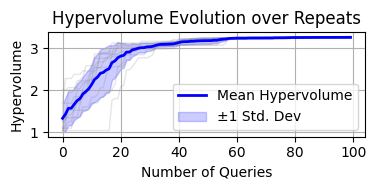

In [17]:
# 绘图
plot_hypervolume_evolution(hypervolumes)
plt.savefig('hypervolume_evolution.png', dpi=300)

In [18]:
logger = bo.logger
history = logger.get_history()

In [35]:
# import importlib
# import mo_bayes_opt.utils.visualization

# importlib.reload(mo_bayes_opt.utils.visualization)

In [34]:
from mo_bayes_opt.utils.visualization import plot_pareto

train_x = history[0][-1]["train_x"]
train_y = history[0][-1]["train_y"]
plot_pareto(train_y, save_path="pareto_front.png", show_line=True)